In [39]:
CONSUMER_KEY = 'zeypo0e476xPpfEOvNlhvyDIJ'
CONSUMER_SECRET = 'mVr7XGt1Ml9LckXkBO6UqZ6xbRBS83f4kVhWYUNWVZ7OeqTni8'
ACCESS_TOKEN = '894203771282051072-UsL8EgHEKbXrXj0sM4cPbJsGJPhaCQ0'
ACCESS_TOKEN_SECRET = 'VRhaPS7HKH1kQpC5QOSO8Foss5Iso0CQafppRfPZjoPjH'


In [40]:
savefile = open('twitter.txt','w')
savefile.close()

In [48]:
import pandas as pd
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import time
import re
import matplotlib. pyplot as plt 

class savetweepyTweets(StreamListener):
 
    def on_data(self, data):
    
        try:
            #print (type(data))
            #print ("New tweet")
            savefile = open('twitter.txt','a')
            savefile.write(data)
            savefile.write('\n')
            savefile.close()
            #x =x+1
            return True
        except BaseException as e:
            print ("Failed ", str(e))
            self.disconnect()
            
    def on_error(self, status):
        print (status)
        stream.disconnect()

tl = savetweepyTweets()
au = OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
au.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)
stream = Stream(au,tl)
api = tweepy.API(au, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [49]:
ls

1568511490_tweepy streaming Zia_class.pdf
1568511515_PBL twitter api access batch-Zia-1.pdf
ClimateChange.ipynb
TwitterHackDay.ipynb
TwitterSentimentAnalysis.ipynb
Untitled.ipynb
ZiaTweepy/
tweepy streaming Zia_class.ipynb
twitter.txt


In [50]:
stream.filter(track=["data scientist","data"], languages=['en'])

KeyboardInterrupt: 

In [51]:
stream.disconnect()

In [52]:
import json
tweets_data = []
json_data = open('twitter.txt','r')
#print type(json_data)
for line in json_data:
    #print type(line)
    try:
        twe = json.loads(line) 
        #print type(twe)
        tweets_data.append(twe)
    except:
        continue


In [53]:
tweet_df = pd.DataFrame(tweets_data)
tweet_df.head()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,lang,timestamp_ms,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,display_text_range,extended_tweet,possibly_sensitive,extended_entities
0,Thu Jan 16 04:23:27 +0000 2020,1217663633423044610,1217663633423044610,RT @Amakah_: I literally stalked this guy’s IG...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,None,...,en,1579148607961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Thu Jan 16 04:23:28 +0000 2020,1217663636199690240,1217663636199690240,"RT @meandermadley: this is cyberpunk\n\n""here'...","<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,None,...,en,1579148608623,1.217191e+18,1217190703392067584,{'created_at': 'Tue Jan 14 21:04:12 +0000 2020...,"{'url': 'https://t.co/2mLY7podoZ', 'expanded':...",NaN,NaN,NaN,NaN
2,Thu Jan 16 04:23:29 +0000 2020,1217663640406392832,1217663640406392832,Data from my Explorer Kit! [Temp: 19.23 | Humi...,"<a href=""https://twitter.com/TM08C11"" rel=""nof...",False,NaN,None,NaN,None,...,en,1579148609626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Thu Jan 16 04:23:29 +0000 2020,1217663640989396992,1217663640989396992,@DynastySkyler @JetPackGalileo I'm using @roto...,"<a href=""http://twitter.com/download/android"" ...",True,1.217662e+18,1217661755314384896,7.787815e+17,778781521599692800,...,en,1579148609765,NaN,NaN,NaN,NaN,"[31, 140]",{'full_text': '@DynastySkyler @JetPackGalileo ...,NaN,NaN
4,Thu Jan 16 04:23:30 +0000 2020,1217663644646797313,1217663644646797313,RT @PogoWasRight: When I couldn't reach a defu...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,None,...,en,1579148610637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df = tweet_df[["created_at","text"]]

In [55]:
df['text_mod'] = df['text'].apply(lambda x: re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", x))

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
df.head()

,created_at,text,text_mod
0,Thu Jan 16 04:23:27 +0000 2020,RT @Amakah_: I literally stalked this guy’s IG...,RT Amakah I literally stalked this guys IG sto...
1,Thu Jan 16 04:23:28 +0000 2020,"RT @meandermadley: this is cyberpunk\n\n""here'...",RT meandermadley this is cyberpunkheres how to...
2,Thu Jan 16 04:23:29 +0000 2020,Data from my Explorer Kit! [Temp: 19.23 | Humi...,Data from my Explorer Kit Temp 1923 Humid 359...
3,Thu Jan 16 04:23:29 +0000 2020,@DynastySkyler @JetPackGalileo I'm using @roto...,DynastySkyler JetPackGalileo Im using rotounde...
4,Thu Jan 16 04:23:30 +0000 2020,RT @PogoWasRight: When I couldn't reach a defu...,RT PogoWasRight When I couldnt reach a defunct...


In [57]:
from textblob import TextBlob

In [58]:
df['polarity'] = df['text_mod'].map(lambda x: TextBlob(x).sentiment.polarity)

/Users/michael/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
df.head()

,created_at,text,text_mod,polarity
0,Thu Jan 16 04:23:27 +0000 2020,RT @Amakah_: I literally stalked this guy’s IG...,RT Amakah I literally stalked this guys IG sto...,0.000000
1,Thu Jan 16 04:23:28 +0000 2020,"RT @meandermadley: this is cyberpunk\n\n""here'...",RT meandermadley this is cyberpunkheres how to...,0.100000
2,Thu Jan 16 04:23:29 +0000 2020,Data from my Explorer Kit! [Temp: 19.23 | Humi...,Data from my Explorer Kit Temp 1923 Humid 359...,0.000000
3,Thu Jan 16 04:23:29 +0000 2020,@DynastySkyler @JetPackGalileo I'm using @roto...,DynastySkyler JetPackGalileo Im using rotounde...,0.216667
4,Thu Jan 16 04:23:30 +0000 2020,RT @PogoWasRight: When I couldn't reach a defu...,RT PogoWasRight When I couldnt reach a defunct...,0.000000


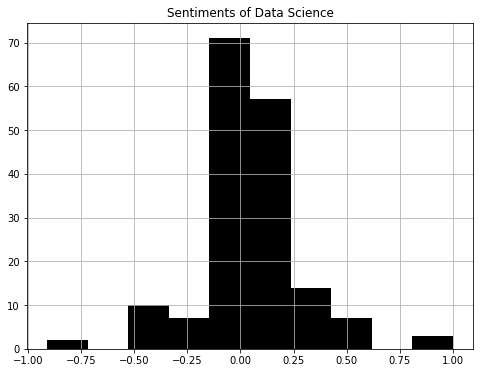

In [60]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
df['polarity'].hist(bins=10,
             ax=ax,
             color="black")

plt.title("Sentiments of Data Science")
plt.show()

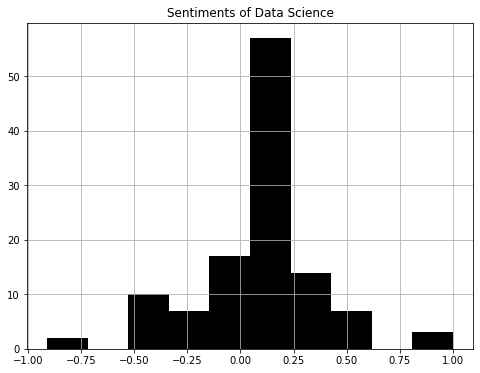

In [61]:
df = df[df['polarity'] != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
df['polarity'].hist(bins=10,
             ax=ax,
             color="black")

plt.title("Sentiments of Data Science")
plt.show()

In [71]:
from nltk.tokenize import word_tokenize

In [72]:
df['tokenize'] = df['text_mod'].map(lambda x: word_tokenize(x))

In [73]:
df.head()

,created_at,text,text_mod,polarity,tokenize
1,Thu Jan 16 04:23:28 +0000 2020,"RT @meandermadley: this is cyberpunk\n\n""here'...",RT meandermadley this is cyberpunkheres how to...,0.100000,"[RT, meandermadley, this, is, cyberpunkheres, ..."
3,Thu Jan 16 04:23:29 +0000 2020,@DynastySkyler @JetPackGalileo I'm using @roto...,DynastySkyler JetPackGalileo Im using rotounde...,0.216667,"[DynastySkyler, JetPackGalileo, Im, using, rot..."
5,Thu Jan 16 04:23:30 +0000 2020,"RT @Zeddary: Also, wow, Grand Havana Room. Sam...",RT Zeddary Also wow Grand Havana Room Same wre...,0.195000,"[RT, Zeddary, Also, wow, Grand, Havana, Room, ..."
6,Thu Jan 16 04:23:30 +0000 2020,@egirIgod bitches wanna look popular so bad sh...,egirIgod bitches wanna look popular so bad shu...,-0.050000,"[egirIgod, bitches, wan, na, look, popular, so..."
7,Thu Jan 16 04:23:30 +0000 2020,"RT @DilliDurAst: So easy to copy? Rs 2,000 not...",RT DilliDurAst So easy to copy Rs 2000 notes m...,-0.033333,"[RT, DilliDurAst, So, easy, to, copy, Rs, 2000..."
